In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv("result/lau_1000.csv")
df.head()

,population,plato,mutation,media,desvio padrao,varianca
0,1000,100,0,378.0,32.323,1044.8
1,1000,100,5,375.0,20.620,425.2
2,1000,100,10,400.0,15.748,248.0
3,1000,100,15,377.0,12.498,156.2
4,1000,100,20,388.0,18.740,351.2


In [3]:
lau200 = pd.read_csv("result/lau_200.csv")
lau400 = pd.read_csv("result/lau_400.csv")

In [4]:
df_f = df.groupby(["plato", "mutation"])["media"].mean().reset_index()

In [5]:
fig = px.scatter(df_f, x = "plato", y = "media")

fig.show()

In [8]:
fig = px.scatter(df, x = "media", y = "desvio padrao", trendline="ols")
fig.add_traces(go.Scatter(x = lau200['media'], y = lau200['desvio padrao']))

fig.show()

In [10]:
df.head()

,population,plato,mutation,media,desvio padrao,varianca
0,1000,100,0,378.0,32.323,1044.8
1,1000,100,5,375.0,20.620,425.2
2,1000,100,10,400.0,15.748,248.0
3,1000,100,15,377.0,12.498,156.2
4,1000,100,20,388.0,18.740,351.2


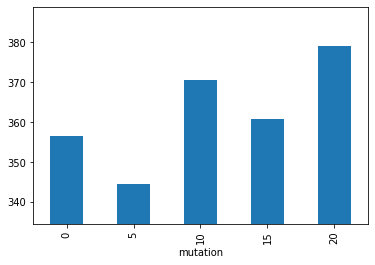

In [21]:
df_f = df.groupby('mutation')['media'].mean()
df_f.plot.bar(x = "mutation", y = "media")

plt.ylim([(df_f.min()-10), (df_f.max()+10)])
plt.show()

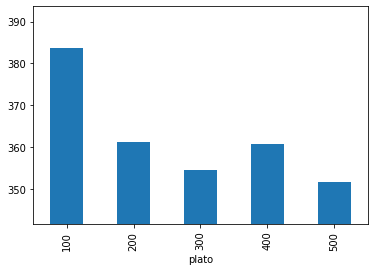

In [22]:
df_f = df.groupby('plato')['media'].mean()
df_f.plot.bar(x = "plato", y = "media")

plt.ylim([(df_f.min()-10), (df_f.max()+10)])
plt.show()

In [23]:
lau600 = pd.read_csv("result/lau_600.csv")
lau800 = pd.read_csv("result/lau_800.csv")

In [47]:
y1 = lau200.groupby('plato')['media'].mean()
y2 = lau400.groupby('plato')['media'].mean()
y3 = lau600.groupby('plato')['media'].mean()
y4 = lau800.groupby('plato')['media'].mean()
y5 = df_f

y1 = pd.concat([y1,y2,y3,y4,y5], axis = 1).reset_index()
y1.columns = ['plato', '200', '400', '600', '800', '1000']
y1

,plato,200,400,600,800,1000
0,100,399.6,399.6,391.2,386.4,383.6
1,200,383.8,381.8,375.6,367.6,361.2
2,300,369.8,361.6,363.0,358.8,354.4
3,400,364.8,355.4,361.6,365.8,360.6
4,500,348.4,359.6,355.0,350.2,351.6


In [48]:
fig = px.bar(y1, x = "plato", y = ['200', '400', '600', '800', '1000'], barmode = 'stack')
fig.show()